<a href="https://colab.research.google.com/github/Nicolas-BZRD/Multi-Video-Temporal-Synchronization/blob/main/Multi_Video_Temporal_Synchronization_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import random

import pandas as pd
import numpy as np

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset

##Create pandas dataframe

Create an array with the advance/delay videos names and their delay fps to create a pandas dataframe.

In [3]:
listFile = os.listdir("/content/drive/MyDrive/ISIA Lab/Dataset/YouTube processed")

data = []
while len(listFile) != 0:
  #a: advance, d: delay

  i = listFile[0]
  if 'A' in i:
    a = i
    d = i.replace('A', 'D')
  elif 'D' in i:
    a = i.replace('D', 'A')
    d = i

  fps = int(i.split('_')[1][:-4])
  data.append([a+'/'+d, fps])

  listFile.remove(a)
  listFile.remove(d)

random.shuffle(data)

Name: "ID+arrA/D_+frameDelay.mp4"<br>
A = Advanced / D = delayed


In [4]:
df = pd.DataFrame(data, columns=["name advance/delay", "fps"])
df.head()

,name advance/delay,fps
0,5715arrA_2.mp4/5715arrD_2.mp4,2
1,8186arrA_3.mp4/8186arrD_3.mp4,3
2,11235arrA_2.mp4/11235arrD_2.mp4,2
3,9443arrA_3.mp4/9443arrD_3.mp4,3
4,6366arrA_0.mp4/6366arrD_0.mp4,0


##Insights on the dataframe

In [5]:
df.describe()


,fps
count,13635.000000
mean,4.104144
std,2.931171
min,0.000000
25%,1.000000
50%,4.000000
75%,7.000000
max,9.000000


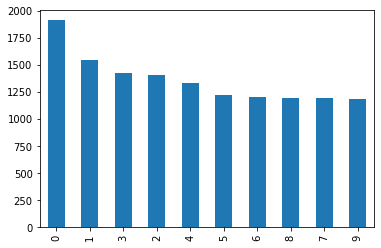

In [21]:
df['fps'].value_counts().plot(kind="bar")

Graph of the number of videos according to their delay

##Preparing the data

#AI

##Siamese CNN-LSTM Network from scratch